# Introduction

Another dataquest.io scenario. I've tried to add a comment line to each line of code, to help explain and rationalise each step i've taken (something lacking in my previous project practices)

**Aim:** clean and analyse dataset using vectorised string methods and other cleaning methods such as apply(), map(), concat(), merge() etc.
- clean and normalise string data
- transform as necessary using apply, map, applymap
- clean or drop missing values
- reshape and combine data

**Dataset:** exit survey results from employees of the Department of Education, Training and Employment (DETE), and Technical and Further Education (TAFE) institute in Queensland, Australia.


https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

**Questions looking to answer:**
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

**Column Information: DETE**
- ID: used to identify the participant of the survey
- SeparationType: why their employment ended
- Cease Date: year or month employment ended
- DETE Start Date: year person began employment

**Column Information: TAFE**
- Record ID: used to identify the participant of the survey
- Reason for ceasing employment: why their employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): length of employment (yrs)

In [1]:
#start by importing appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#read in datasets

dete_survey = pd.read_csv('../input/employee-exit-survey/dete_survey.csv')
tafe_survey = pd.read_csv('../input/employee-exit-survey/tafe_survey.csv')

# Data Exploration - understanding dataset and how values of different columns are represented

In [3]:
#to make data exploration easier, condense it down into a few steps and create a function:

def explore(dataset):
    print(dataset.info())
    print(dataset.head())
    sns.heatmap(dataset.isnull(),cbar = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

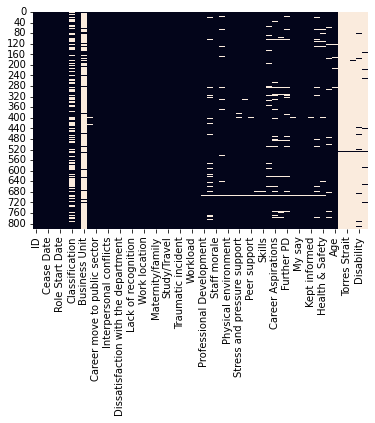

In [4]:
#some exploratory steps
explore(dete_survey)


In [5]:
dete_survey['DETE Start Date'].unique()

array(['1984', 'Not Stated', '2011', '2005', '1970', '1994', '1972',
       '1988', '2009', '1997', '1999', '1998', '1967', '2007', '1995',
       '1996', '2006', '1989', '1982', '1980', '1973', '1981', '1974',
       '1975', '1978', '2003', '2000', '1977', '1976', '1985', '2008',
       '1963', '1993', '1979', '1990', '1969', '1966', '2010', '1968',
       '1991', '1971', '2002', '1986', '2004', '2012', '1983', '2001',
       '1987', '1992', '2013', '1965'], dtype=object)

In [6]:
dete_survey['Workplace issue'].value_counts()

A     357
N     160
SA    115
D      77
SD     65
M      14
Name: Workplace issue, dtype: int64

### Observations: DETE survey
- to score some of the responses to the survey, a matrix has been used of A, N, SA, D, SD and M
- some results are True/False booleans, others are strings. only ID stored as integer
- many columns, particularly at the end have many null values, e.g. 'Aboriginal', 'Torres Strait'
- in the start date and other date columns, there are entries 'Not Stated' (saved as string) which should be na values

relevant columns are only those that can help answer questions relating to disatisfaction. Therefore, there are many columns that can be ignore/excluded. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

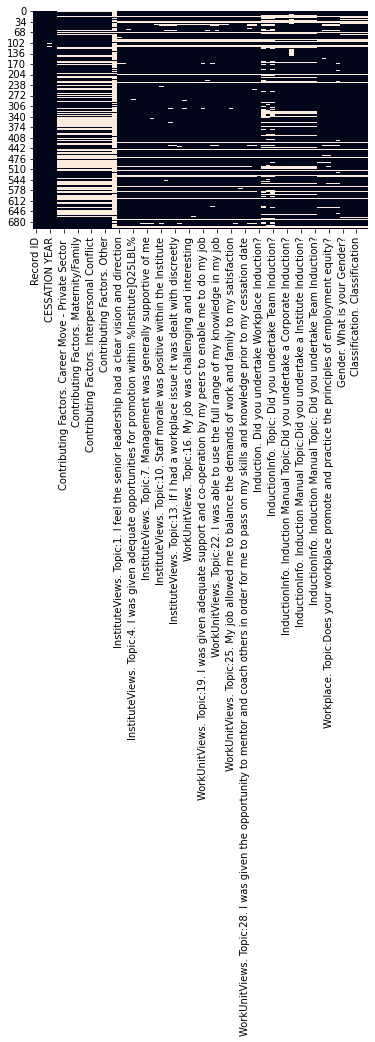

In [7]:
explore(tafe_survey)

In [8]:
tafe_survey['CurrentAge. Current Age'].unique()

array(['26  30', nan, '41  45', '56 or older', '20 or younger', '46  50',
       '36  40', '21  25', '51-55', '31  35'], dtype=object)

### Observations: TAFE survey
- 72 total columns, 702 entries. column values relate to answers to questions
- column names are very inconsistent, some have repeated names 
- Again, many columns can be ignored/excluded as do not help to answer our questions

# Data Cleaning - first steps

In [9]:
#read in dete_survey.csv again, but setting na_values to Not Stated (as found in date columns)

dete_survey = pd.read_csv('../input/employee-exit-survey/dete_survey.csv', na_values='Not Stated')

In [10]:
#dropping columns that won't aid in the analysis

#dete survey - first 28 or so column names seem to relate strongly to dissatisfaction
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

#tafe_survey - first 16 columns have 'contributing factors' in their titles
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [11]:
#confirmatory step - checking columns were dropped

dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [12]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

# Data Cleaning - column names
I'll need to combine the data together - there are many columns shared between the dataframes but named differently, e.g.:

dete_survey:tafe_survey 

- ID and Record ID,
- SeparationType and Reason for ceasing employment
- Cease Date and CESSATION YEAR
- Age, CurrentAge. Current Age
- Gender, Gender. What is your Gender?

Before combining, i'll therefore have to standardise the columns by first renaming them. 

In [13]:
#focusing on dete_survey_updated

#make all capitalisation lowercase
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

In [14]:
#confirmatory step
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
tafe_columns = {'Record ID': 'id', 'CESSATION YEAR':'cease_date','Reason for ceasing employment':'separationtype', 'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age', 'Employment Type. Employment Type':'employment_status','Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}


In [16]:
#renaming columns in tafe_survey_updated
#passing in dict, along column axis
tafe_survey_updated = tafe_survey_updated.rename(tafe_columns, axis=1)

In [17]:
#confirmatory step
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Some general formatting for the dete dataset, and I changed the specific columns of interest for the tafe dataset with .rename()

# Data Cleaning - isolating respondents that resigned
Next I'll separate the data to include only those that resigned, i.e. separationtype as resignation. 

In [18]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [20]:
#I'll use a boolean operation to index the dataframe, to isolate correct entries
dete_bool = dete_survey_updated['separationtype'].str.contains("Resignation")
dete_resignations = dete_survey_updated[dete_bool]

In [21]:
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [22]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [23]:
#There's only one Resignation entry, which makes it easier for this dataset
tafe_bool = tafe_survey_updated['separationtype'] == 'Resignation'
tafe_resignations = tafe_survey_updated[tafe_bool]

In [24]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


# Data Cleaning - verifying data
Checking for inconsistencies and illogical entries:
- cease_date should be > than dete_start_date
- dete_start_date should be a realistic number, e.g. 1940~ onwards



In [25]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [26]:
#vectorised string method to extract the year from above series. I'll split between /, last index
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

#convert datatype to float to match dete start date format
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [27]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [28]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [29]:
#already in the correct format
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

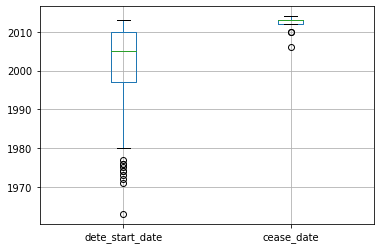

In [30]:
dete_resignations.boxplot(column=['dete_start_date', 'cease_date'])
plt.show()



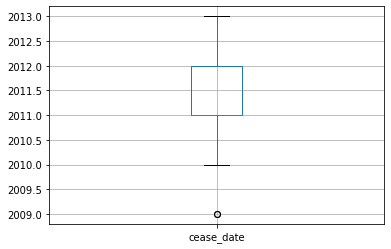

In [31]:
tafe_resignations.boxplot(column='cease_date')
plt.show()

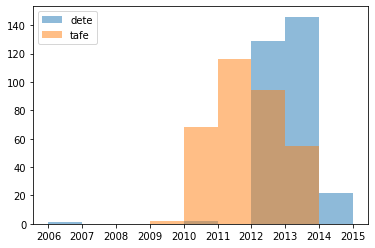

In [32]:
#plotting a histogram to check distribution of both datasets
#using np.arange (similar to range()) to step each point by 1, xticks and bins
plt.hist(dete_resignations['cease_date'], alpha=0.5, bins=np.arange(2006, 2016, 1), label='dete')
plt.hist(tafe_resignations['cease_date'], alpha=0.5, bins=np.arange(2006, 2016, 1), label='tafe')
plt.legend()
plt.xticks(np.arange(2006, 2016, 1))
plt.show()

### Observations
- outliers in start date and cease date seem realistic
- discrepancy between datasets for cease date; either data wasn't recorded for those years/missing, or no resignations during those years

I won't drop the years, despite not matching between datasets. To answer the original questions, we don't need to analyse by year as we're more interested in age of the respondent and how long they were employed at the institutes. 

# Data Cleaning - creating columns to help analysis
I'll create a new column containing the length of service for all participants, based on their starting and end date. For the TAFE dataset, this information is already contained within a column, which I renamed to 'institute_service'. 
- allows me to answer the first question, regarding reasons why short-term and long-term employees left


<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

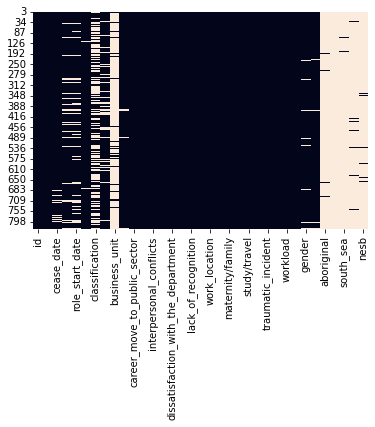

In [33]:
#quick exploration to confirm which columns to use
explore(dete_resignations)

In [34]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

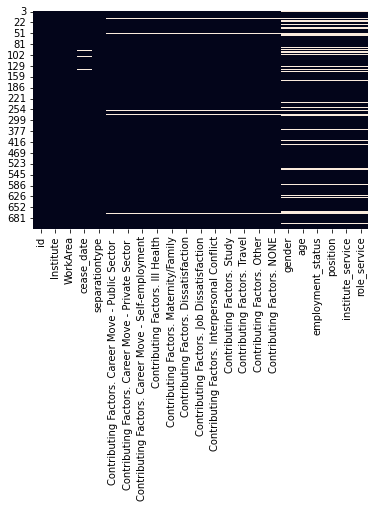

In [35]:
explore(tafe_resignations)

### Filtering based on participants' responses

I'll focus my analysis on the following columns:

**TAFE**
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

**DETE**
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

if employee indicates any of the above caused their resignation, I'll mark them as dissatisfied in a new column.

**Method**
1. convert values in contributing factors (TAFE dataset) to True, False or NaN
2. any columns contain True value, add True value to dissatisfied

In [36]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [37]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [38]:
#write function to convert values in contributing factors (TAFE dataset) to True, False or NaN

def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

In [39]:
#use applymap, passing above function to convert values to True, False, NaN
#use df.any() method in a separate column 'Dissatisfied' where if value in those two columns
# = True, then returns True, if None are True, returns False, if NaN, return NaN...

#this means if the response in any element in those selects rows returns the above, it'll return the equivalent
#in the dissatisfied column
#e.g. True, False, True == True.  False, False, True = True, False, False, False = False

#from the documentation: Return whether any element is True, potentially over an axis.

#Returns False unless there is at least one element within a series or along a Dataframe axis that is True or equivalent
#(e.g. non-zero or non-empty).

tafe_resignations['Dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

#in order to avoid SettingWithCopy Warning
tafe_resignations_up = tafe_resignations.copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
tafe_resignations_up['Dissatisfied'].value_counts()

False    241
True      99
Name: Dissatisfied, dtype: int64

In [41]:
tafe_resignations['Dissatisfied'].value_counts()

False    241
True      99
Name: Dissatisfied, dtype: int64

In [42]:
dete_resignations['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [43]:
#creating a dissatisfied column in dete dataset now
#responses to the indicated columns are already in boolean form
dete_resignations['Dissatisfied'] = dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [44]:
dete_resignations['Dissatisfied'].value_counts()

False    162
True     149
Name: Dissatisfied, dtype: int64

# Data Cleaning - combining data
Before, I'll add a column to each dataframe with an entry of either 'DETE' or TAFE' to allow me to distinguish between the entry sources.

In [45]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [46]:
#I first tried a merge, but had to convert institute_service for the TAFE dataset to float, to match DETE
# tafe_resignations['institute_service'] = tafe_resignations['institute_service'].astype(float)
#however, trying this made me realise values are stored as between numbers e.g. 1-2 years etc.
#therefore, I proceed with a pd.concat()

In [47]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [48]:
combined_updated = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [49]:
combined_updated.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#still columns left in df that are not required 
combined_updated.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
dissatisfied                                           311
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           3

In [51]:
#will drop those with <500 non null values
combined_updated = combined_updated.dropna(thresh=499, axis=1)

In [52]:
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
id                   651
separationtype       651
Dissatisfied         651
institute            651
dtype: int64

# Data Cleaning - Institute_service
The final column that needs cleaning in order to perform some analysis on the data. The values, now combined, are represented in a couple of different forms. As a range e.g. 1-2, 11-20, as floats e.g. 5.0, 1.0.

These numbers need to be converted into categories. The categories I'll define are based on this article:

https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage


    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company


In [53]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [54]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [55]:
#had to do a bit of stackoverflow on this one...

#first, define regex pattern
# https://regexr.com/
# \d = match any digit character (0-9), i.e. regex pattern for digit 
# the + is a quantifier, telling extract to find anything that matches 1 or more of the above token. otherwise
# would just add single digits to the list
#pattern = r'(\d+)'

#however, managed to get the same result by using:
pattern = r'([0-9]+)'
#as \d is any digit, so [0-9], and sticking on a quantifier + at the end is essentially the same as above
#unless I am mistaken?


combined_updated['institute_service_years'] = combined_updated['institute_service'].str.extract(pattern)
combined_updated['institute_service_years'] = combined_updated['institute_service_years'].astype(float)

In [56]:
combined_updated['institute_service_years'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: institute_service_years, dtype: int64

### Next steps 
Now the values have been converted into an appropriate single-year format, I'll need to map each value to the years categories mentioned previously:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

**Method**
1. create function to map each year value to definitions (above)
2. series.apply() to apply created function to institute_service
3. assign to new columns, 'service_cat'

In [57]:
def year_map(value):
    if pd.isnull(value): #required, otherwise would return error of NaN and int unsupported for the operators
        return np.nan
    elif value < 3:
        return 'New (less than 3 years)'
    elif value >= 3 and value <= 6:
        return 'Experienced (6 years or less)'
    elif value > 6 and value <= 10:
        return 'Established (10 years or less)'
    elif value >= 11:
        return 'Veteran (11 years or more)'

In [58]:
combined_updated['service_cat'] = combined_updated['institute_service_years'].apply(year_map)

In [59]:
combined_updated['service_cat'].value_counts()

New (less than 3 years)           193
Experienced (6 years or less)     172
Veteran (11 years or more)        136
Established (10 years or less)     62
Name: service_cat, dtype: int64

# Data Cleaning - age
To answer our second question: Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [60]:
#appears to suffer from the same issue as institute_service
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [61]:
pattern = r'([0-9]+)'

combined_updated['age_years'] = combined_updated['age'].str.extract(pattern)
combined_updated['age_years'] = combined_updated['age_years'].astype(float)

In [62]:
#a rough estimation, as we don't have specific years
combined_updated['age_years'].value_counts()

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age_years, dtype: int64

### Age bracket proposal

- Young adult = >= 20 <= 30
- Older adult = > 30 < 40
- Middle aged = >= 40 <= 50
- Senior = 51+

In [63]:
def age_map(value):
    if pd.isnull(value): #required, otherwise would return error of NaN and int unsupported for the operators
        return np.nan
    elif value <= 30:
        return 'Young adult (less than 30 years old)'
    elif value > 30 and value <= 40:
        return 'Older adult (40 years old or less)'
    elif value >= 40 and value <= 50:
        return 'Middle aged (50 years old or less)'
    elif value >= 51:
        return 'Senior (51 and above)'

In [64]:
combined_updated['age_years_cat'] = combined_updated['age_years'].apply(age_map)

In [65]:
combined_updated['age_years_cat'].value_counts()

Middle aged (50 years old or less)      174
Senior (51 and above)                   149
Young adult (less than 30 years old)    139
Older adult (40 years old or less)      134
Name: age_years_cat, dtype: int64

# Data Analysis

As the dissatisfied column consists of Boolean values (True or False), I can use df.pivot_table(), as the boolean values are treated as integers, i.e. True = 1, False = 0
- allows aggregation to calculate num. of people in each group

In [66]:
#confirming number of boolean values
combined_updated['Dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: Dissatisfied, dtype: int64

In [67]:
#imputation - i'll fill missing values with reasonable estimates
#now, i'll replace the NaN values with False values - providing it doesn't affect the overall analysis
#otherwise, might be worth dropping. but i'll go ahead with this for now

combined_updated['Dissatisfied'] = combined_updated['Dissatisfied'].fillna(value=False)

In [68]:
combined_updated['Dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: Dissatisfied, dtype: int64

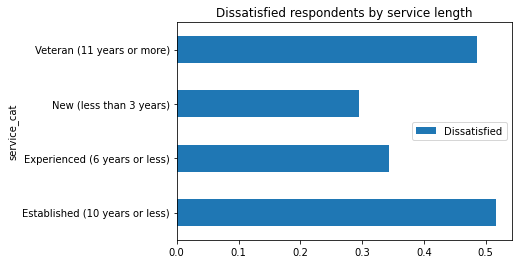

In [69]:
#plotting first the service length
dissatisfaction_percent_service = combined_updated.pivot_table(values='Dissatisfied', index='service_cat')
                                                       
dissatisfaction_percent_service.plot(kind='barh')
plt.title('Dissatisfied respondents by service length')
plt.show()

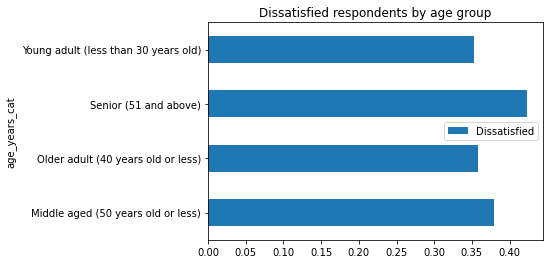

In [70]:
#by age
dissatisfaction_percent_age = combined_updated.pivot_table(values='Dissatisfied', index='age_years_cat')
                                                       
dissatisfaction_percent_age.plot(kind='barh')
plt.title('Dissatisfied respondents by age group')
plt.show()

# Final Observations

From the analysis above, we can infer that employees with a service length over 6 years generally have a greater chance of resigning due to job dissatisfaction. Newer employees with a service length of less than 3 years were the least likely to leave due to reasons of job dissatisfaction.

In terms of age, those falling within the senior (51+) category were more likely to respond as dissatisfied. However, the discrepancy here is less significant than in the service length. This most likely shows a stronger correlation between job dissatisfaction and service length than with how old the respondent was. 